In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = '../data/iclr_2023_info_with_gender.npy'
data = np.load(data_path, allow_pickle=True).item()

In [3]:
data['RUzSobdYy0V']

{'rating_1': [5, 6, 8],
 'confidence_1': [4, 3, 3],
 'withdraw_1': 0,
 'title': 'Quantifying and Mitigating the Impact of Label Errors on Model Disparity Metrics',
 'keyword': [],
 'area': 'Social Aspects of Machine Learning (eg, AI safety, fairness, privacy, interpretability, human-AI interaction, ethics)',
 'rating_2': [5, 6, 8],
 'confidence_2': [4, 3, 3],
 'withdraw_2': 0,
 'rating_3': [5, 6, 8],
 'confidence_3': [4, 3, 3],
 'withdraw_3': 0,
 'decision': 'Accept: poster',
 'author': ['Julius Adebayo', 'Melissa Hall', 'Bowen Yu', 'Bobbie Chern'],
 'gender': 1,
 'gender_info': {'script': 'LATIN',
  'id': '63b502b5-9e21-4a57-a4a3-ed1c09813c0e',
  'name': 'Julius Adebayo',
  'likelyGender': 'male',
  'genderScale': -0.7603662228579757,
  'score': 7.790072971984657,
  'probabilityCalibrated': 0.8801831114289879}}

In [4]:
gender_available = 0
for key,value in data.items():
    if 'gender_info' in value.keys():
        gender_available += 1
print(gender_available,gender_available/len(data))

3851 0.7901107919573246


In [5]:
decision_types = []
for key,value in data.items():
    
    if value['decision'] in decision_types or isinstance(value['decision'], float) :
        continue
    else:
        decision_types.append(value['decision'])
        # print(type(value['decision']))
        # print(value)

print(decision_types)


['Accept: poster', 'Reject', 'Accept: notable-top-5%', 'Accept: notable-top-25%']


In [6]:
# ['Accept: poster', 'Reject', 'Accept: notable-top-5%', 'Accept: notable-top-25%']
def decision2num(decision):
    if decision == 'Accept: poster':
        return 1
    elif decision == 'Accept: notable-top-5%':
        return 2
    elif decision == 'Accept: notable-top-25%':
        return 3
    elif decision == 'Reject':
        return 0

    
gender_info = []
decision = []
average_rating = []

for key,value in data.items():
    if 'gender' in value.keys() and not isinstance(value['decision'],float):
        gender_info.append(value['gender'])
        decision.append(decision2num(value['decision']))
        average_rating.append(np.mean(value['rating_3']))

print(len(gender_info),len(decision),len(average_rating))


3842 3842 3842


([<matplotlib.patches.Wedge at 0x1fc85d9e8b0>,
 [Text(-0.8402026960930804, 0.7099714286349269, 'male'),
  Text(0.916584723116638, -0.7745143286919851, 'female')],
 [Text(-0.45829237968713465, 0.3872571428917783, '77.7%'),
  Text(0.5346744218180387, -0.4518000250703246, '22.3%')])

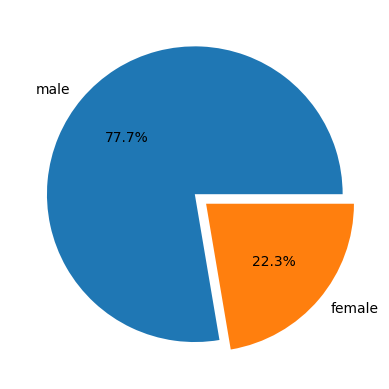

In [7]:
# visualize the gender_info in a pie chart use matplotlib
gender_percentage = [sum(gender_info),len(gender_info)-sum(gender_info)]
gender_explode = [0,0.1]
autopct='%1.1f%%'
labels = ['male','female']
plt.pie(gender_percentage,gender_explode,labels=labels,autopct=autopct)

([<matplotlib.patches.Wedge at 0x1fc88264400>,
 [Text(-0.4532896906095045, 1.002261670616581, 'Reject'),
  Text(0.17247556989179347, -1.0863941171556948, 'Accept: poster'),
  Text(0.9740015561960536, -0.5111956264754876, 'Accept: notable-top-25%'),
  Text(1.0744316438666102, -0.2357894031929633, 'Accept: notable-top-5%')],
 [Text(-0.24724892215063882, 0.5466881839726805, '63.5%'),
  Text(0.09407758357734188, -0.5925786093576516, '28.0%'),
  Text(0.5312735761069383, -0.2788339780775386, '1.6%'),
  Text(0.5860536239272419, -0.1286124017416163, '6.9%')])

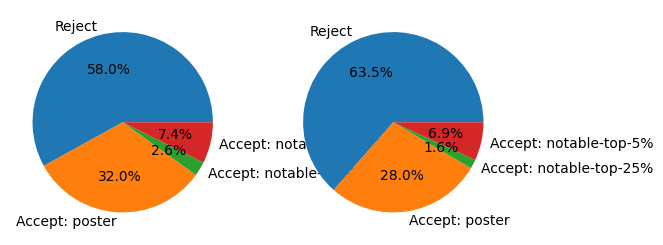

In [8]:
# different gender decision rate
male_decision = [0]*4
female_decision = [0]*4
for gender, d in zip(gender_info,decision):
    if gender == 1:
        male_decision[d] += 1
    else:
        female_decision[d] += 1

# visualize the decision of different gender separately in two pie charts
labels = ['Reject','Accept: poster', 'Accept: notable-top-25%', 'Accept: notable-top-5%']

# plot the male chart in left, while female chart in right
plt.subplot(1,2,1)
plt.pie(male_decision,labels=labels,autopct=autopct)
plt.subplot(1,2,2)
plt.pie(female_decision,labels=labels,autopct=autopct)

In [9]:
# create pandas dataframe
gender_data = {'gender':gender_info,'decision':decision,'average_rating':average_rating}
df = pd.DataFrame(gender_data)
df.head()

,gender,decision,average_rating
0,1,1,6.333333
1,1,0,3.250000
2,1,1,6.600000
3,0,1,6.666667
4,0,1,6.250000


Text(0, 0.5, 'number of papers')

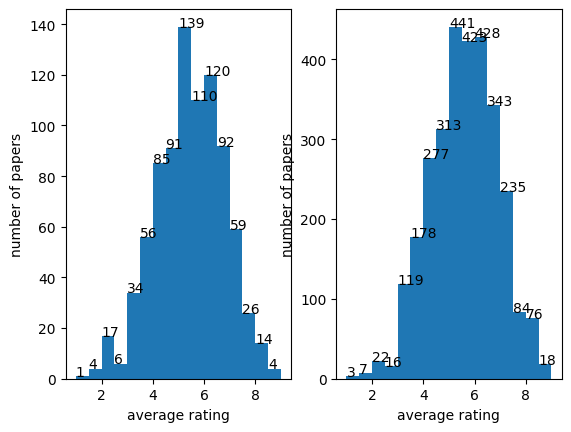

In [22]:
# visualize the distribution of average rating of female
# only visulalize those data that gender == 0
plt.subplot(1,2,1)
n_female, bins_female, patches_female = plt.hist(df[df['gender']==0]['average_rating'], bins=16,range=(1,9))
# add the statistic value of each bin
for i in range(len(patches_female)):
    plt.text(bins_female[i],n_female[i],str(int(n_female[i])))
plt.xlabel('average rating')
plt.ylabel('number of papers')

plt.subplot(1,2,2)
n_male, bins_male, patches_male = plt.hist(df[df['gender']==1]['average_rating'], bins=16,range=(1,9))
# add the statistic value of each bin
for i in range(len(patches_female)):
    plt.text(bins_male[i],n_male[i],str(int(n_male[i])))
plt.xlabel('average rating')
plt.ylabel('number of papers')

[0.0011655  0.004662   0.01981352 0.00699301 0.03962704 0.06526807
 0.0990676  0.10606061 0.16200466 0.12820513 0.13986014 0.10722611
 0.06876457 0.03030303 0.01631702 0.004662  ]


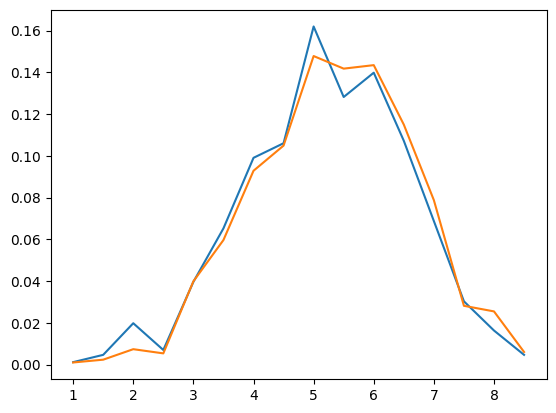

In [32]:
# visualize the percentage of average_rating
n_female_percentage = n_female / sum(n_female)
n_male_percentage = n_male / sum(n_male)
print(n_female_percentage)

# draw two percentages into one plot, using alpha to make the two plot transparent
plt.plot([1+i*0.5 for i in range(16)],n_female_percentage)
plt.plot([1+i*0.5 for i in range(16)],n_male_percentage)

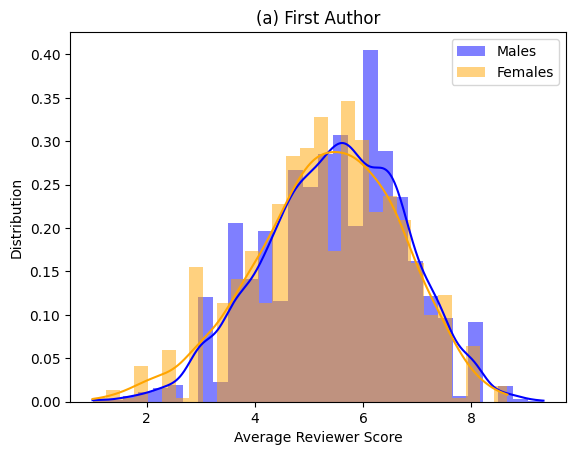

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Example data (replace with your actual data)
male_scores = df[df['gender']==1]['average_rating']
female_scores = df[df['gender']==0]['average_rating']

# Calculate the point density
male_kde = gaussian_kde(male_scores)
female_kde = gaussian_kde(female_scores)

male_x = np.linspace(min(male_scores), max(male_scores), 1000)
female_x = np.linspace(min(female_scores), max(female_scores), 1000)

male_density = male_kde(male_x)
female_density = female_kde(female_x)

# Plotting the histograms and PDFs
fig, ax = plt.subplots()

# Histogram for males
ax.hist(male_scores, bins=30, density=True, color='blue', alpha=0.5, label='Males')
# PDF for males
ax.plot(male_x, male_density, color='blue')

# Histogram for females
ax.hist(female_scores, bins=30, density=True, color='orange', alpha=0.5, label='Females')
# PDF for females
ax.plot(female_x, female_density, color='orange')

# Adding labels and title
ax.set_xlabel('Average Reviewer Score')
ax.set_ylabel('Distribution')
ax.set_title('(a) First Author')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [37]:
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
u_statistic, p_value


(1351103.5, 0.013119816465492404)